In [1]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import peakutils

#%config InlineBackend.figure_format = 'svg'
plt.rcParams['figure.figsize'] = 10.5, 4
%config InlineBackend.figure_format = 'svg'

# Task 1: Simple Model

A simple model to explain the growth of organism is the exponential model given by $\frac{dN}{dt} = rN$ where $N(t)$ is the population at time $t$ and $r > 0$ is the growth rate. But exponential growth is unrealistic. Therefore, to incorporate the ideas of overcrowding and limited resources, in the exponential growth model logistic equation is used. The following one-dimensional model is such a logistic equation $\frac{dN(t)}{dt}=\frac{rN}{1-\frac{N}{K}}$ where $N(t)$ is the population at time $t$ , $r > 0$ is the growth rate and $K$ is the carrying capacity.

1. Solve the above equation analytically and plot the result in a time series manner.
2. Simulate it using numerical tools and compare the plots (try different solvers and step sizes)

Seperate

$\frac{dN(t)}{N(t)(1-\frac{N(t)}{K})} = r \times dt$

Partial Fraction Decomposition

$\frac{1}{N(t)(1-\frac{N(t)}{K})} = \frac{1}{N} + \frac{\frac{1}{K}}{1-\frac{N(t)}{K}}$

Substitution and Integration

$\int \frac{1}{N(t)} + \frac{\frac{1}{K}}{1-\frac{N(t)}{K}} dN \int r \times dt$

$\int r \times dt = rt + C_1$

$\int \frac{1}{N(t)} dN = \ln{N(t)} + C_2$

$\int \frac{\frac{1}{K}}{1 - \frac{N(t)}{K}} dN$ 
use $u = 1 - \frac{N(t)}{K}$ 
and $du = - \frac{1}{k} dN$

$\int \frac{-du}{u} = -\ln u + C_3 = -\ln{1 - \frac{N(t)}{K}} + C_3$

$\ln{N(t)} - \ln{1 - \frac{N(t)}{K}} = \ln{\frac{N(t)}{1-\frac{N(t)}{K}}} = rt + C$

$\frac{N(t)}{1-\frac{N(t)}{K}} = e^{rt + C} = Ae^{rt}$ 

Cross Multiply

$N(t) = Ae^{rt} \times 1 - \frac{N(t)}{K}$

$N(t) = Ae^{rt} - Ae^{rt} \times \frac{N(t)}{K}$

$N(t) + Ae^{rt} \times \frac{N(t)}{K} = N(t)\big[1 + \frac{Ae^{rt}}{K}\big] = Ae^{rt}$

$N(t) = \frac{Ae^{rt}}{1 + \frac{Ae^{rt}}{K}}$

A can be solved with initial condition at time $t=0$

$Ae^0 = A = \frac{N(0)}{1-\frac{N(0)}{K}}$

In [2]:
time_delta = .5

In [3]:
n_0 = 5
r = 3
K = 100
hours = 6
t = np.arange(0, hours, time_delta)

In [4]:
A = n_0 / (1 - n_0 / K)

def f_analytical(t):
    return A * np.exp(r * t) / (1 + A * np.exp(r * t) / K)

N_analytical = f_analytical(t)

In [5]:
# Calculate Numerical Solution

def f(n, t):
    return r * n * (1 - n / K)

N_numerical = odeint(f, n_0, t)

The numerical solution is calculated with `scipy.integrate` and the results are compared below. 

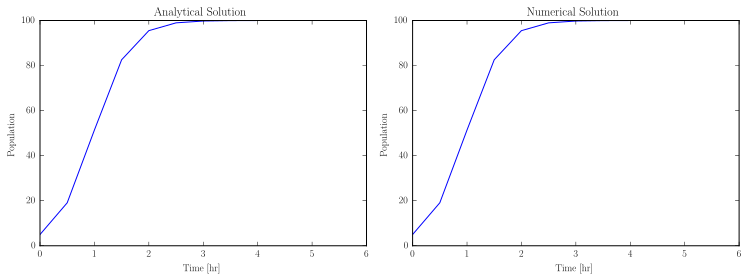

In [6]:
fig, axes = plt.subplots(1,2)

axes[0].set_title('Analytical Solution')
axes[0].set_xlabel('Time [hr]')
axes[0].set_ylabel('Population')
axes[0].plot(t, N_analytical)

axes[1].set_title('Numerical Solution')
axes[1].set_xlabel('Time [hr]')
axes[1].set_ylabel('Population')
axes[1].plot(t, N_numerical)

plt.tight_layout()
plt.show()

# Task 2: Genetic Feedback Model for Circadian Clocks

We consider a 3-dimensional Goldbeter model for expression and regulation of the Neurospora “frequency protein” (FRQ). For the concentrations of the mRNA (M), the “frequency protein” (FC) synthesized in the cytoplasm and the successively built up protein concentration (FN) in the nucleus, we obtain the following system of three differential equations:


$\frac{dM}{dt} = V_s \frac{K^n}{K^n + F_N^n} - V_m \frac{M}{K_M+M}$

$\frac{dF_C}{dt} = k_s M - V_d \frac{F_C}{K_d + F_C} - k_{in}F_C + k_{out}F_N$

$\frac{dF_N}{dt} = k_{in}F_C - k_{out}F_N$

Simulate this 3-dim Goldbeter model with suitable parameters, whereby you should start with the following parameter set and try to alter it in order to obtain the experimentally observed intrinsic period P = 21.5 h (see below)!

1. Investigate the intrinsic “circadian clock” for different transport rates kin and estimate the resulting Period in the time plot for M(t) and F(t). Which parameters produce a Period ≈ 21.5 h, the value for Neurospora in constant darkness?
2. During the ‘time loop’ determine a list of time points T_eve, where the cytoskeletal protein level F(t) is maximal. By the mean difference mean(diff(T_eve))compute the Period of the “clock”.
3. Moreover, in the state diagram as well as „eve“ in the time diagram, try to mark the “quarter phases”, when the intrinsic clock attains its “evening” (T_eve), “midnight”, “morning” and “noon”.

In [7]:
hours = 24 * 25
t = np.arange(0, hours, time_delta)

In [8]:
def calc_period(peaks):
    x = []
    for i in range(1, len(peaks) - 1):
        der = peaks[i + 1] - peaks[i]
        der = der * time_delta
        x.append(der)
    return np.mean(x)

## Task 2a

Modifying the original value of $k_{in}=0.02$ to $k_{in}=0.0248$ causes the period to change from $T \approx 23.7 \text{hr}$ to $T \approx 21.5 \text{hr}$

In [9]:
V_s = 1.5
V_m = 1.5
V_d = 1.0
k_s = 0.5
K = 0.2
K_m = 0.15
K_d = 0.15
k_in = 0.0248
k_out = 0.1
n = 4

def f(y, t):
    M, F_C, F_N = y
    
    f0 = V_s * K ** n / (K ** n + F_N ** n) - V_m * M / (K_m + M)
    f1 = k_s * M - V_d * F_C / (K_d + F_C) - k_in * F_C + k_out * F_N
    f2 = k_in * F_C - k_out * F_N
    
    return [f0, f1, f2]

y_0 = M_0, F_C_0, F_N_0 = 0, 0, 0
soln = odeint(f, y_0, t)

M_soln, F_C_soln, F_N_soln = soln[:,0], soln[:,1], soln[:,2]

F_C_peaks = peakutils.indexes(F_C_soln)
F_N_peaks = peakutils.indexes(F_N_soln)
M_peaks = peakutils.indexes(M_soln)

During the ‘time loop’ determine a list of time points T_eve, where the cytoskeletal protein level F(t) is maximal. By the mean difference mean(diff(T_eve))compute the Period of the “clock”.

The maximum nuclear concentration occurs at the following times [hr]:

In [10]:
print(*(F_N_peaks * time_delta), sep=', ')

18.5, 43.0, 65.0, 87.0, 108.5, 130.0, 151.5, 173.0, 194.5, 215.5, 237.0, 258.0, 279.5, 300.5, 322.0, 343.0, 364.5, 385.5, 407.0, 428.0, 449.0, 470.5, 491.5, 513.0, 534.0, 555.5, 576.5, 597.5


Below is reported the time gap [hr] following maximal nuclear concentration before maximal cytoplasm concentration:

In [11]:
print(*((F_N_peaks - F_C_peaks) * time_delta), sep=', ') 

3.0, 3.0, 3.0, 3.5, 3.0, 3.0, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5


The circadian clock is plotted with the maximum nuclear concentration in each period as a green circle. The evolution of each product over time is plotted to the right. It shows that the osciallation becomes steady very quickly.

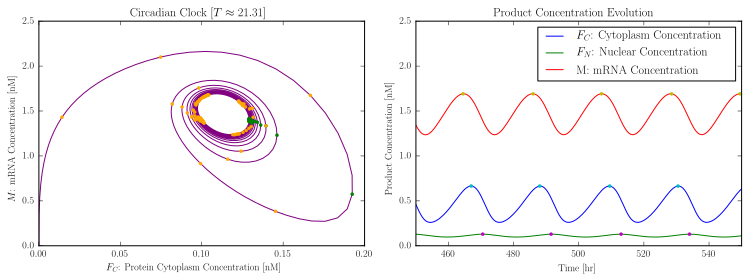

In [12]:
fig, axes = plt.subplots(1, 2)

period = calc_period(F_C_peaks)
axes[0].set_title('Circadian Clock [$T \\approx {:.2f}$]'.format(period))
axes[0].set_xlabel('$F_C$: Protein Cytoplasm Concentration [nM]')
axes[0].set_ylabel('$M$: mRNA Concentration [nM]')
axes[0].plot(F_N_soln, M_soln, c='purple')
axes[0].plot(F_N_soln[F_N_peaks], M_soln[F_N_peaks], '.', c='green')

midnight = F_N_peaks + period / time_delta / 4
morning = F_N_peaks + period / time_delta * 2 / 4
noon = F_N_peaks + period / time_delta * 3 / 4
non_eve = (np.hstack([midnight, morning, noon]) % hours / time_delta).astype(int)
axes[0].plot(F_N_soln[non_eve], M_soln[non_eve], '.', c='orange')

axes[1].set_title('Product Concentration Evolution')
axes[1].set_xlabel('Time [hr]')
axes[1].set_ylabel('Product Concentration [nM]')
axes[1].set_xlim(450, 550)
axes[1].plot(t, F_C_soln)
axes[1].plot(t, F_N_soln)
axes[1].plot(t, M_soln)
axes[1].legend(['$F_C$: Cytoplasm Concentration', '$F_N$: Nuclear Concentration', 'M: mRNA Concentration'])
axes[1].plot(F_C_peaks * time_delta, F_C_soln[F_C_peaks], '.')
axes[1].plot(F_N_peaks * time_delta, F_N_soln[F_N_peaks], '.')
axes[1].plot(M_peaks * time_delta,   M_soln[M_peaks], '.')

plt.tight_layout()
plt.show()

# Task 3

Perform simulations to show, under which conditions a 12-12 hours light-dark stimulus is able to entrain the intrensic *Neurospora* clock.

1. Take $step=0.5$ for the increase of transcription rate altering the mRNA production speed $V_s$ from ${V_s}_0=1.5$ during 12 hours of darkness to ${V_s}_1 = {V_s}_0 + step$ during the following 12 hours of light.
2. Will the intrinsic clock be entrained by the 24h cycle?
3. What is the minimal step increase in transcription rate (Step) that induces entrainment of the intrinsic Neurospora clock by the 12-12 h light-dark stimulus?
4. How does the outcome depend on the “phase” of first light switch off stimulus relative to the intrinsic clock cycle?

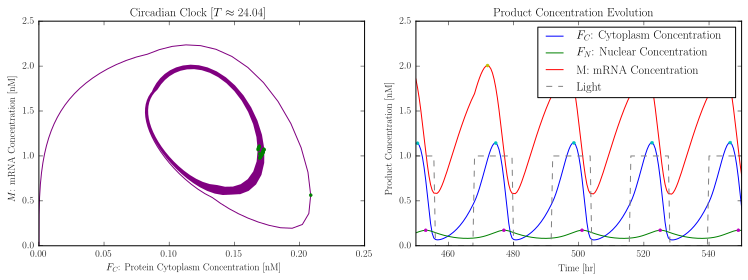

In [13]:
hours = 24 * 25
t = np.arange(0, hours, time_delta)

step = 0.06 #0.04 is interesting, 0.06 is winner
dark = 12
light = 12

V_s = 1.5
V_m = 1.5
V_d = 1.0
k_s = 0.5
K = 0.2
K_m = 0.15
K_d = 0.15
k_in = 0.0248
k_out = 0.1
n = 4

def f(y, t):
    M, F_C, F_N = y
    
    local_V_s = V_s if t % (dark + light) < dark else V_s + step
    
    f0 = local_V_s * K ** n / (K ** n + F_N ** n) - V_m * M / (K_m + M)
    f1 = k_s * M - V_d * F_C / (K_d + F_C) - k_in * F_C + k_out * F_N
    f2 = k_in * F_C - k_out * F_N
    
    return [f0, f1, f2]

y_0 = M_0, F_C_0, F_N_0 = 0, 0, 0
soln = odeint(f, y_0, t)

M_soln, F_C_soln, F_N_soln = soln[:,0], soln[:,1], soln[:,2]

F_C_peaks = peakutils.indexes(F_C_soln)
F_N_peaks = peakutils.indexes(F_N_soln)
M_peaks = peakutils.indexes(M_soln)

fig, axes = plt.subplots(1, 2)

period = calc_period(F_C_peaks)
axes[0].set_title('Circadian Clock [$T \\approx {:.2f}$]'.format(period))
axes[0].set_xlabel('$F_C$: Protein Cytoplasm Concentration [nM]')
axes[0].set_ylabel('$M$: mRNA Concentration [nM]')
axes[0].plot(F_N_soln, M_soln, c='purple')
axes[0].plot(F_N_soln[F_N_peaks], M_soln[F_N_peaks], '.', c='green')

axes[1].set_title('Product Concentration Evolution')
axes[1].set_xlabel('Time [hr]')
axes[1].set_ylabel('Product Concentration [nM]')
axes[1].set_xlim(450, 550)
axes[1].plot(t, F_C_soln)
axes[1].plot(t, F_N_soln)
axes[1].plot(t, M_soln)
axes[1].plot(t, t % (dark + light) >= dark, '--', c='grey')
axes[1].legend(['$F_C$: Cytoplasm Concentration', '$F_N$: Nuclear Concentration', 'M: mRNA Concentration', 'Light'])
axes[1].plot(F_C_peaks * time_delta, F_C_soln[F_C_peaks], '.')
axes[1].plot(F_N_peaks * time_delta, F_N_soln[F_N_peaks], '.')
axes[1].plot(M_peaks * time_delta,   M_soln[M_peaks], '.')

plt.tight_layout()
plt.show()

The tipping point is around $step=0.06$. Below this value, the clock becomes erradic and the period goes to around 21 hours. Above this value, the clock stabilizes and the period turns to 24 hours. The above graph shows the stable clock with $step=0.06$

After stabilizing, the signal seems to lock with the minimial nuclear protein concentration at the beginning of the light application and the minimal cytoplasm protein concentration at the end of the light application.

# Task 4

Perform simulations to show under which conditions a 18-6 light-dark stimulus is able to entrain the intrensic *Neurospora* clock. Modify the simulations of Task 2 using 8 hours of darkness and 18 hours of light.

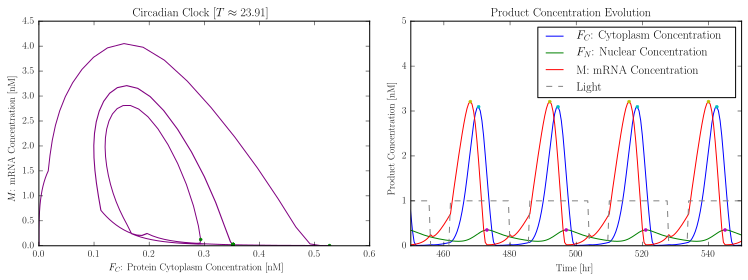

In [14]:
hours = 24 * 25
t = np.arange(0, hours, time_delta)

step = 0.5
dark = 6
light = 18

V_s = 1.5
V_m = 1.5
V_d = 1.0
k_s = 0.5
K = 0.2
K_m = 0.15
K_d = 0.15
k_in = 0.0248
k_out = 0.1
n = 4

def f(y, t):
    M, F_C, F_N = y
   
    local_V_s = V_s if t % (dark + light) < dark else V_s + step
    
    f0 = local_V_s * K ** n / (K ** n + F_N ** n) - V_m * M / (K_m + M)
    f1 = k_s * M - V_d * F_C / (K_d + F_C) - k_in * F_C + k_out * F_N
    f2 = k_in * F_C - k_out * F_N
    
    return [f0, f1, f2]

y_0 = M_0, F_C_0, F_N_0 = 0, 0, 0
soln = odeint(f, y_0, t)

M_soln, F_C_soln, F_N_soln = soln[:,0], soln[:,1], soln[:,2]

F_C_peaks = peakutils.indexes(F_C_soln)
F_N_peaks = peakutils.indexes(F_N_soln)
M_peaks = peakutils.indexes(M_soln)

fig, axes = plt.subplots(1, 2)

period = calc_period(F_C_peaks)
axes[0].set_title('Circadian Clock [$T \\approx {:.2f}$]'.format(period))
axes[0].set_xlabel('$F_C$: Protein Cytoplasm Concentration [nM]')
axes[0].set_ylabel('$M$: mRNA Concentration [nM]')
axes[0].plot(F_N_soln, M_soln, c='purple')
axes[0].plot(F_N_soln[F_N_peaks], M_soln[F_N_peaks], '.', c='green')

axes[1].set_title('Product Concentration Evolution')
axes[1].set_xlabel('Time [hr]')
axes[1].set_ylabel('Product Concentration [nM]')
axes[1].set_xlim(450, 550)
axes[1].plot(t, F_C_soln)
axes[1].plot(t, F_N_soln)
axes[1].plot(t, M_soln)
axes[1].plot(t, t % (dark + light) >= dark, '--', c='grey')
axes[1].legend(['$F_C$: Cytoplasm Concentration', '$F_N$: Nuclear Concentration', 'M: mRNA Concentration', 'Light'])
axes[1].plot(F_C_peaks * time_delta, F_C_soln[F_C_peaks], '.')
axes[1].plot(F_N_peaks * time_delta, F_N_soln[F_N_peaks], '.')
axes[1].plot(M_peaks * time_delta,   M_soln[M_peaks], '.')

plt.tight_layout()
plt.show()

# Task 5

Perform simulations by changing the parameter $V_s$. Does the oscillation disappears above / below some specific value?

/usr/local/lib/python3.5/site-packages/numpy/core/_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)


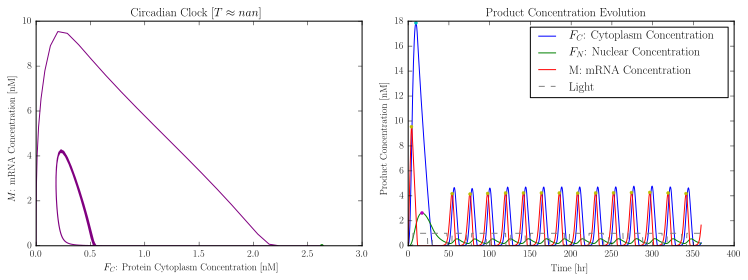

In [15]:
hours = 24 * 15
t = np.arange(0, hours, time_delta)

step = 0.06
dark = 6
light = 18

V_s = 4
V_m = 1.5
V_d = 1.0
k_s = 0.5
K = 0.2
K_m = 0.15
K_d = 0.15
k_in = 0.0248
k_out = 0.1
n = 4

def f(y, t):
    M, F_C, F_N = y
   
    local_V_s = V_s if t % (dark + light) < dark else V_s + step
    
    f0 = local_V_s * K ** n / (K ** n + F_N ** n) - V_m * M / (K_m + M)
    f1 = k_s * M - V_d * F_C / (K_d + F_C) - k_in * F_C + k_out * F_N
    f2 = k_in * F_C - k_out * F_N
    
    return [f0, f1, f2]

y_0 = M_0, F_C_0, F_N_0 = 0, 0, 0
soln = odeint(f, y_0, t)

M_soln, F_C_soln, F_N_soln = soln[:,0], soln[:,1], soln[:,2]

F_C_peaks = peakutils.indexes(F_C_soln)
F_N_peaks = peakutils.indexes(F_N_soln)
M_peaks = peakutils.indexes(M_soln)

fig, axes = plt.subplots(1, 2)

period = calc_period(F_C_peaks)
axes[0].set_title('Circadian Clock [$T \\approx {:.2f}$]'.format(period))
axes[0].set_xlabel('$F_C$: Protein Cytoplasm Concentration [nM]')
axes[0].set_ylabel('$M$: mRNA Concentration [nM]')
axes[0].plot(F_N_soln, M_soln, c='purple')
axes[0].plot(F_N_soln[F_N_peaks], M_soln[F_N_peaks], '.', c='green')

axes[1].set_title('Product Concentration Evolution')
axes[1].set_xlabel('Time [hr]')
axes[1].set_ylabel('Product Concentration [nM]')
axes[1].plot(t, F_C_soln)
axes[1].plot(t, F_N_soln)
axes[1].plot(t, M_soln)
axes[1].plot(t, t % (dark + light) >= dark, '--', c='grey')
axes[1].legend(['$F_C$: Cytoplasm Concentration', '$F_N$: Nuclear Concentration', 'M: mRNA Concentration', 'Light'])
axes[1].plot(F_C_peaks * time_delta, F_C_soln[F_C_peaks], '.')
axes[1].plot(F_N_peaks * time_delta, F_N_soln[F_N_peaks], '.')
axes[1].plot(M_peaks * time_delta,   M_soln[M_peaks], '.')

plt.tight_layout()
plt.show()

Down to values of 0.001, the oscillation stays robust, just with smaller protein concentrations. As $V_s$ increases past 3.0, the osciallation time becomes so large and the protein concentration so high, that it is not biologically reasonable. 

# Task 6

## Task 6a

Solve the differential equation system in Task 3 for fixed points and record the positive & real solution(s) only. Note that the fixed points are given by the solution set of the vector field equated to zero. You can solve a system of equation by a computer algebra system, e.g. using SAGE or its online version, or using a homotopy solver such as Bertini (which works for much higher dimensional systems).

Calculating the fixed point of a dynamical system means setting each derivative to zero:

$0=\frac{dM}{dt} = V_s \frac{K^n}{K^n + F_N^n} - V_m \frac{M}{K_M+M}$

$0=\frac{dF_C}{dt} = k_s M - V_d \frac{F_C}{K_d + F_C} - k_{in}F_C + k_{out}F_N$

$0=\frac{dF_N}{dt} = k_{in}F_C - k_{out}F_N$

## Task 6b

Compute the Jacobian matrix at the positive real solution and compute the corresponding eigen values. Try to understand the significance of eigenvalues and what do they signify in the current example.

$\textbf{J}=
 \begin{bmatrix}
  \frac{\partial^2 M}{\partial t \partial M} & \frac{\partial^2 M}{\partial t \partial F_C} & \frac{\partial^2M}{\partial t \partial F_N}\\
  \frac{\partial^2 F_C}{\partial t \partial M} & \frac{\partial^2 F_C}{\partial t \partial F_C} & \frac{\partial^2 F_C}{\partial t \partial F_N} \\
 \frac{\partial^2 F_N}{\partial t \partial M} & \frac{\partial^2 F_N}{\partial t \partial F_C} & \frac{\partial^2 F_N}{\partial t \partial F_N}
\end{bmatrix}=
\begin{bmatrix}
  -V_m \frac{K_m}{{(K_m + M)}^2} & 0 & V_s\frac{K^n}{{(K^n+{F_N}^n)^2}}n{F_N}^{n-1}\\
  k_s & -V_d\frac{K_d}{{(K_d + F_C)}^2} - k_{in} & k_{out} \\
 0 & k_{in} & -k_{out}
 \end{bmatrix} 
$

## Task 6c

Solve the differential equation system for the value of the $V_s$ for which the oscillation disappears and at which oscillation appears (cf. Task 5) and compare the respective eigen values. Explain your findings!

The following code was executed on SAGE:

```python
def ll(s):
    print('$' + latex(s) + '$\n\n' )

V_s = 4
V_m = 1.5
V_d = 1.0
k_s = 0.5
K = 0.2
K_m = 0.15
K_d = 0.15
k_in = 0.0248
k_out = 0.1
n = 4

M = var('M')
F_C = var('F_C')
F_N = var('F_N')

f0 = V_s * K ** n / (K ** n + F_N ** n) - V_m * M / (K_m + M)
f1 = k_s * M - V_d * F_C / (K_d + F_C) - k_in * F_C + k_out * F_N
f2 = k_in * F_C - k_out * F_N

fixed_points = solve([f0==0, f1==0, f2==0], M, F_C, F_N)
T(M, F_C, F_N) = [f0, f1, f2]
jac = T.diff()

cc = ComplexField(prec=3)

for i, fixed_point in enumerate(fixed_points, start=1):
    print('## Fixed Point {}\n'.format(i))
    a, b, c = [v.rhs() for v in fixed_point]
    ll(val)
    jac_soln = jac(a, b, c)
    jac_eval = matrix(cc, jac_soln)
    print('### Jacobian\n')
    ll(jac_eval)
    print('### Jacobian Eigenvalues\n')
    jac_eigens = jac_eval.eigenvalues()
    ll(jac_eigens)
```

Producing the following output:

## Fixed Point 1

$ \left[M = 1.72643051771, F_{C} = 0.946613939694, F_{N} = 0.234760248071\right] $


### Jacobian

$ \left(\begin{array}{rrr}
-0.062 & 0.00 & -16. \\
0.50 & -0.16 & 0.094 \\
0.00 & 0.023 & -0.094
\end{array}\right) $


### Jacobian Eigenvalues

$ \left[0.19 + 0.50i, 0.19 - 0.50i, -0.62\right] $

After changing $V_m$ from $V_m=1.5$ to $V_m=2.0$

## Fixed Point 1

$ \left[M = 1.69695405266, F_{C} = 0.839948783611, F_{N} = 0.208307307933\right] $


### Jacobian

$ \left(\begin{array}{rrr}
-0.094 & 0.00 & -20. \\
0.50 & -0.19 & 0.094 \\
0.00 & 0.023 & -0.094
\end{array}\right) $


### Jacobian Eigenvalues

$ \left[0.19 + 0.50i, 0.19 - 0.50i, -0.75\right] $

Finally, a scan to determine where the eigenvalues flipped from imaginary to positive.


```python
import numpy as np
V_s = 4
V_d = 1.0
k_s = 0.5
K = 0.2
K_m = 0.15
K_d = 0.15
k_in = 0.0248
k_out = 0.1
n = 4

M = var('M')
F_C = var('F_C')
F_N = var('F_N')

for V_m in np.arange(0, 20, 0.05):
    f0 = V_s * K ** n / (K ** n + F_N ** n) - V_m * M / (K_m + M)
    f1 = k_s * M - V_d * F_C / (K_d + F_C) - k_in * F_C + k_out * F_N
    f2 = k_in * F_C - k_out * F_N


    fixed_points = solve([f0==0, f1==0, f2==0], M, F_C, F_N)
    T(M, F_C, F_N) = [f0, f1, f2]
    jac = T.diff()

    cc = ComplexField(prec=3)

    for i, fixed_point in enumerate(fixed_points, start=1):
        a, b, c = [v.rhs() for v in fixed_point]
        if not all([a in RR, a > 0, b in RR, b > 0, c in RR, c > 0]):
            continue
        jac_soln = jac(a, b, c)
        jac_eval = matrix(cc, jac_soln)
        jac_eigens = jac_eval.eigenvalues()
        print(V_m, jac_eigens)
```

Between $V_m=4.55$ and $V_m=4.56$, the eigenvalues go from imaginary to negative. Between $V_m=6.25$ and $V_m=6.3$, they go back to imaginary, then again to positive between $V_m=7.05$ and $V_m=7.1$.